In [1]:
import warnings

import h5py  # to read the dataset file
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision.transforms as tfms
from fastai.basics import *
from fastai.vision.all import *
from matplotlib.ticker import MaxNLocator  # integer pyplot ticks
from sklearn import metrics
from torch.utils.data import Dataset
from torchvision import models

warnings.filterwarnings("ignore")

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from my_utils import dotdict

In [6]:
from wandb_sweep import get_dls, get_learner

In [11]:
from model_eval import get_val_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

#### tl_best6

In [54]:
import wandb

api = wandb.Api()

sweep_id = "g31vwkha"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [55]:
best_run_config = dotdict(best_run_config)
experiment_no = best_run_config.experiment_no
best_run_config.inference = True
del best_run_config.experiment_no
experiment_no

2

In [56]:
dls, image_size, n_channels = get_dls(best_run_config)

In [57]:
learner = get_learner(best_run_config, dls, n_channels)

In [58]:
learner.load(f"{sweep_id}_run{experiment_no}")

In [59]:
preds, targets, soft_preds, y_true, y_pred = get_val_preds(learner)

In [60]:
cm = metrics.confusion_matrix(y_true, y_pred)

In [61]:
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 99.15%
Macro-averaged F1-score: 98.13%


In [62]:
vocab = list(learner.dls.train_ds.class_dict.keys())

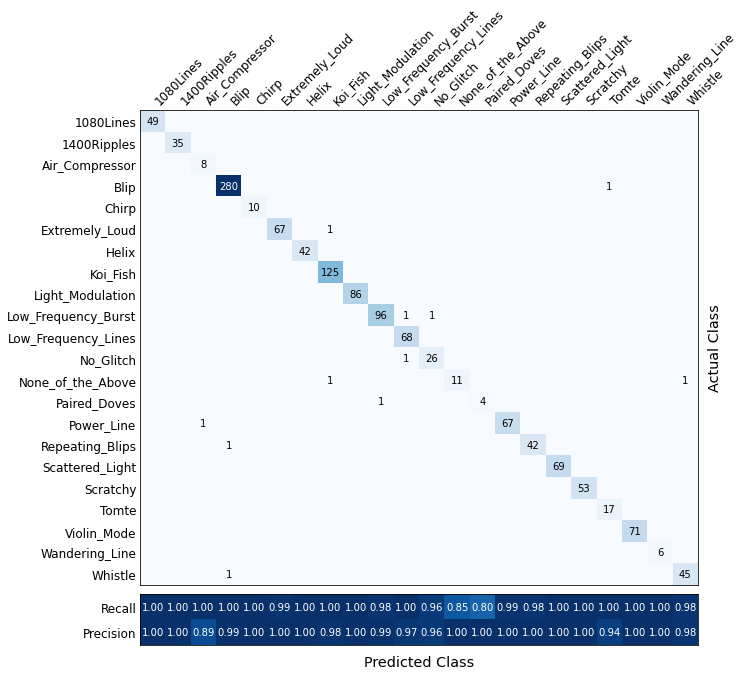

In [63]:
fig, axes = plot_CM_PR(cm, y_true=y_true, y_pred=y_pred, vocab=vocab)
#fig.savefig("../figs/glitches/04_baseline_best_cm.png", dpi=300, bbox_inches="tight")

In [64]:
interp = Interpretation.from_learner(learner)

In [68]:
channel_list = [2, 2, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1]

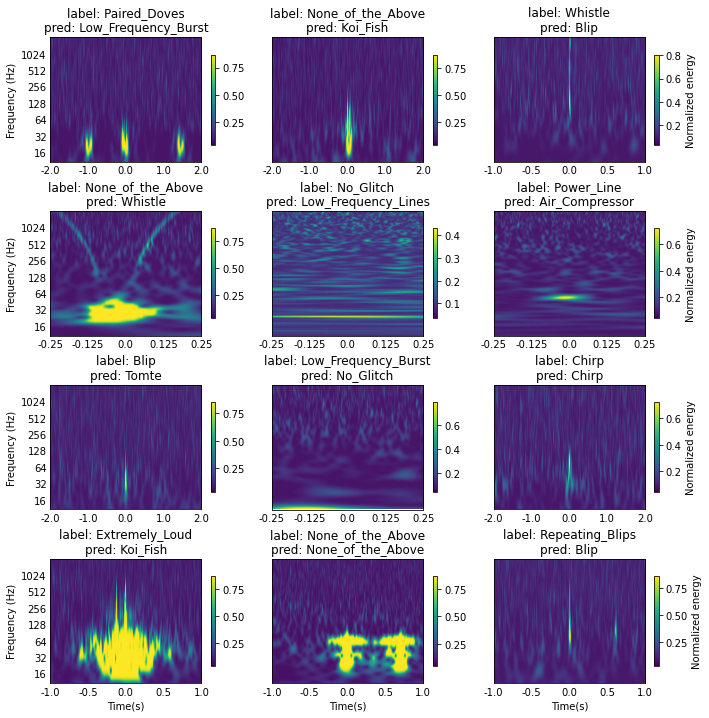

In [69]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=4, ncols=3,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(10, 10)
)

#fig.savefig('../figs/glitches/04_baseline_best_mislabeled_samples.png', dpi=300)

#### tl_fast2

In [31]:
import wandb
api = wandb.Api()

sweep_id = "g1aqz63h"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [32]:
best_run_config = dotdict(best_run_config)
experiment_no = best_run_config.experiment_no
best_run_config.inference = True
del best_run_config.experiment_no
experiment_no

4

In [33]:
dls, image_size, n_channels = get_dls(best_run_config)

In [34]:
learner = get_learner(best_run_config, dls, n_channels)

In [35]:
learner.load(f"{sweep_id}_run{experiment_no}")

In [36]:
preds, targets, soft_preds, y_true, y_pred = get_val_preds(learner)

In [37]:
cm = metrics.confusion_matrix(y_true, y_pred)

In [38]:
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 99.07%
Macro-averaged F1-score: 98.06%


In [39]:
vocab = list(learner.dls.train_ds.class_dict.keys())

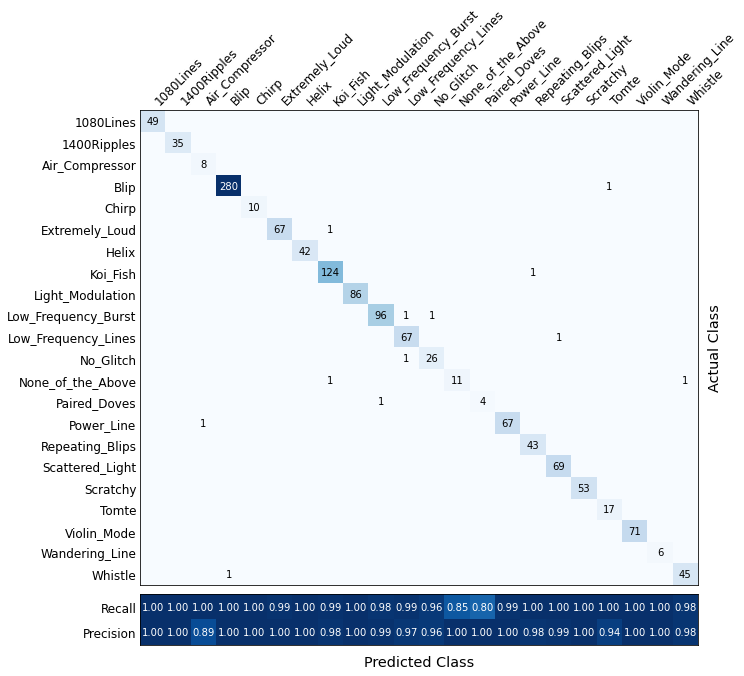

In [40]:
fig, axes = plot_CM_PR(cm, y_true=y_true, y_pred=y_pred, vocab=vocab)
#fig.savefig("../figs/glitches/04_baseline_best_cm.png", dpi=300, bbox_inches="tight")

In [41]:
interp = Interpretation.from_learner(learner)

In [42]:
channel_list = [0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1]

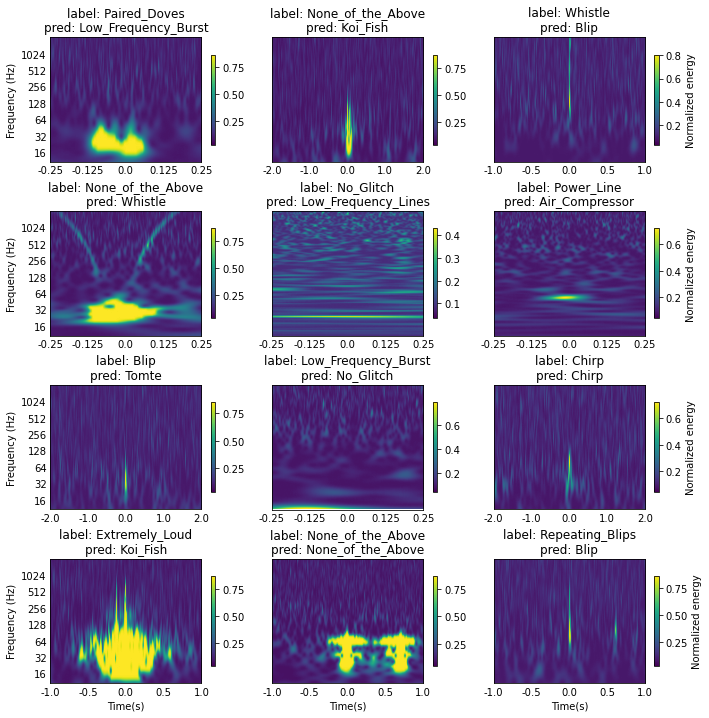

In [67]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=4, ncols=3,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(10, 10)
)

#fig.savefig('../figs/glitches/04_baseline_best_mislabeled_samples.png', dpi=300)